In [1]:
import os
import glob
import pandas as pd

# 🔹 1. Set your folder path
input_folder = r"C:\Users\rjimm\Sales Data Python Project"

# 🔹 2. Get all CSV files inside the folder
all_files = glob.glob(os.path.join(input_folder, "*.csv"))
print("🔍 Found CSV files:", all_files)

# 🔹 3. Read and combine
li = []
for filename in all_files:
    df = pd.read_csv(filename)
    li.append(df)

# 🔹 4. Merge into one DataFrame
combined_df = pd.concat(li, ignore_index=True)
print("✅ Combined shape:", combined_df.shape)

# Preview first rows
print(combined_df.head())


🔍 Found CSV files: ['C:\\Users\\rjimm\\Sales Data Python Project\\Sales_April_2019.csv', 'C:\\Users\\rjimm\\Sales Data Python Project\\Sales_August_2019.csv', 'C:\\Users\\rjimm\\Sales Data Python Project\\Sales_December_2019.csv', 'C:\\Users\\rjimm\\Sales Data Python Project\\Sales_February_2019.csv', 'C:\\Users\\rjimm\\Sales Data Python Project\\Sales_January_2019.csv', 'C:\\Users\\rjimm\\Sales Data Python Project\\Sales_July_2019.csv', 'C:\\Users\\rjimm\\Sales Data Python Project\\Sales_June_2019.csv', 'C:\\Users\\rjimm\\Sales Data Python Project\\Sales_March_2019.csv', 'C:\\Users\\rjimm\\Sales Data Python Project\\Sales_May_2019.csv', 'C:\\Users\\rjimm\\Sales Data Python Project\\Sales_November_2019.csv', 'C:\\Users\\rjimm\\Sales Data Python Project\\Sales_October_2019.csv', 'C:\\Users\\rjimm\\Sales Data Python Project\\Sales_September_2019.csv']
✅ Combined shape: (186850, 6)
  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable

In [4]:
import pandas as pd

# Assuming you already combined all CSVs into combined_df
# Example: combined_df = pd.concat([df1, df2, df3], ignore_index=True)

# 1. Drop rows with critical missing values
combined_df = combined_df.dropna(subset=['Order Date', 'Sales', 'City'])

# 2. Convert Order Date to datetime
combined_df['Order Date'] = pd.to_datetime(combined_df['Order Date'], errors='coerce')

# Optional: Drop rows where conversion failed
combined_df = combined_df.dropna(subset=['Order Date'])

# 3. Extract Month and Year (can be useful for aggregation)
combined_df['Month'] = combined_df['Order Date'].dt.month
combined_df['Year'] = combined_df['Order Date'].dt.year

# 4. Ensure Sales is numeric
combined_df['Sales'] = pd.to_numeric(combined_df['Sales'], errors='coerce')

# Optional: Drop rows where Sales conversion failed
combined_df = combined_df.dropna(subset=['Sales'])

# 5. Ensure City column exists and clean it
combined_df['City'] = combined_df['City'].astype(str).str.strip()

# Check the cleaned data
print(combined_df.head())
print(f"Rows after cleaning: {len(combined_df)}")




  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable               2.0       11.95   
2   176559  Bose SoundSport Headphones               1.0       99.99   
3   176560                Google Phone               1.0      600.00   
4   176560            Wired Headphones               1.0       11.99   
5   176561            Wired Headphones               1.0       11.99   

           Order Date                      Purchase Address  Month   Sales  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4   23.90   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4   99.99   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4  600.00   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   11.99   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4   11.99   

          City  Year  
0       Dallas  2019  
2       Boston  2019  
3  Los Angeles  2019  
4  Los

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: style
sns.set_style("whitegrid")



=== Monthly Sales Trend ===


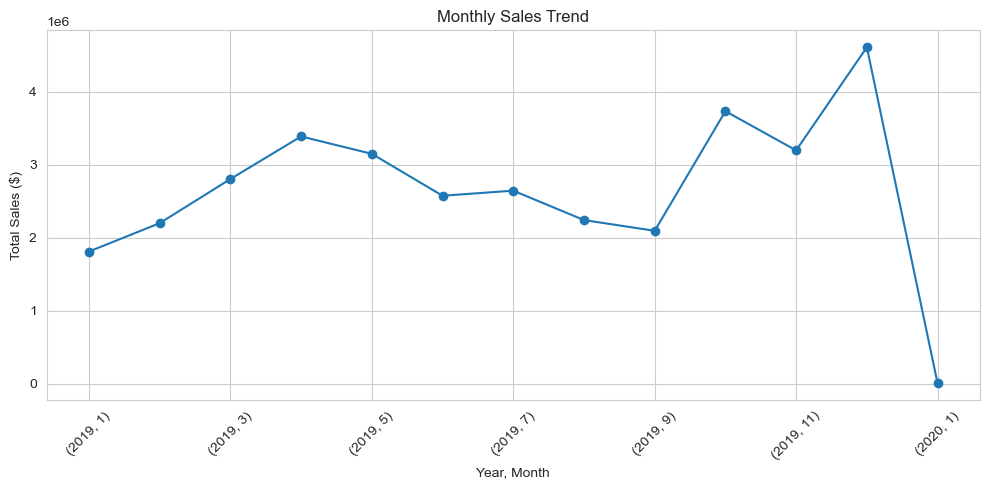

In [8]:
# =======================
# Monthly Sales Trend
# =======================
print("=== Monthly Sales Trend ===")

monthly_sales = combined_df.groupby(['Year','Month'])['Sales'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Year, Month")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


=== City-wise Sales ===


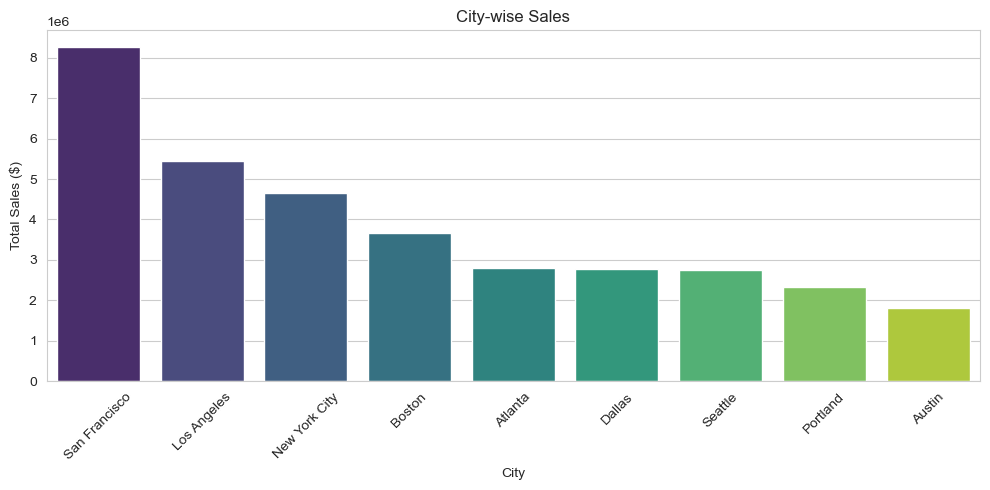

In [10]:
# =======================
# City-wise Sales
# =======================
print("=== City-wise Sales ===")

city_sales = combined_df.groupby('City')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=city_sales.index, y=city_sales.values, hue=city_sales.index, palette="viridis", legend=False)
plt.title("City-wise Sales")
plt.xlabel("City")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



=== Top 10 Products by Sales ===


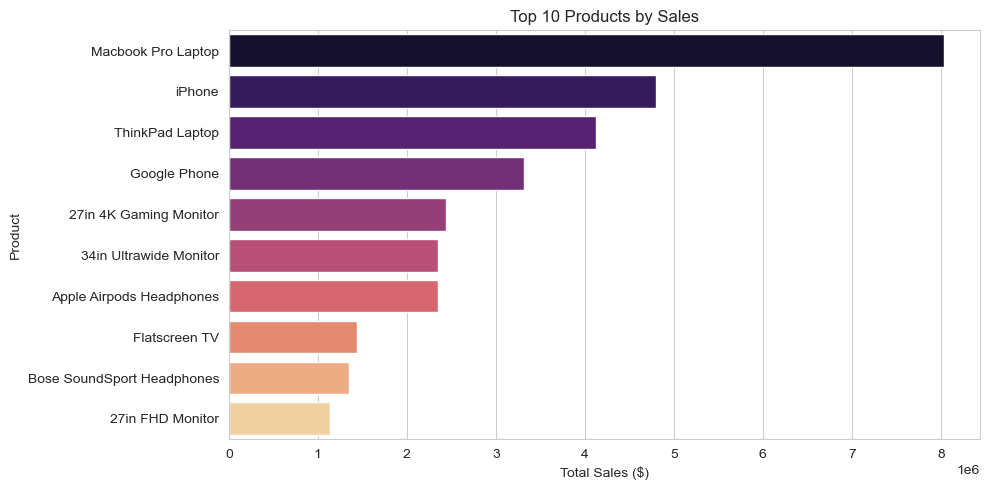

In [11]:
# ================================
# Top 10 Products by Sales
# ================================
print("=== Top 10 Products by Sales ===")

top_products = combined_df.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette="magma", legend=False)
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


=== Top 10 Products by Quantity Ordered ===


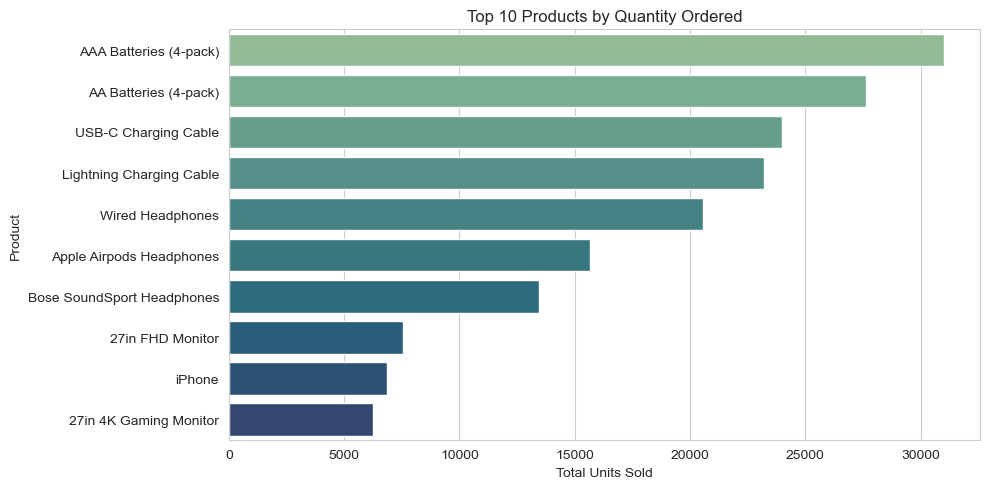

In [12]:
# =========================================
# 4️⃣ Top 10 Products by Quantity Ordered
# =========================================
print("=== Top 10 Products by Quantity Ordered ===")

top_quantity = combined_df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_quantity.values, y=top_quantity.index, hue=top_quantity.index, palette="crest", legend=False)
plt.title("Top 10 Products by Quantity Ordered")
plt.xlabel("Total Units Sold")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


=== Average Order Value (AOV) per City ===


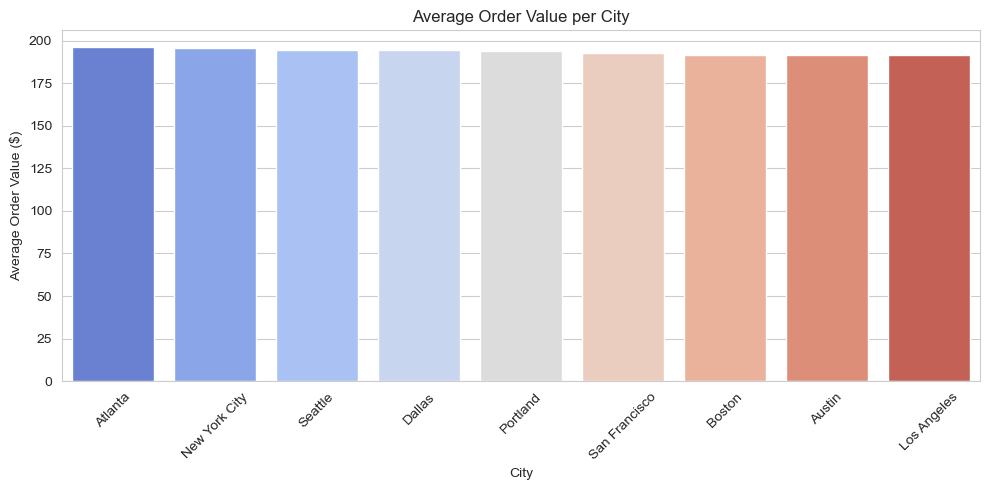

In [13]:
# ====================================
# Average Order Value per City
# ====================================
print("=== Average Order Value (AOV) per City ===")

# Calculate AOV = Total Sales / Number of Orders
city_orders = combined_df.groupby('City')['Order ID'].nunique()
city_sales = combined_df.groupby('City')['Sales'].sum()
aov_city = (city_sales / city_orders).sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=aov_city.index, y=aov_city.values, hue=aov_city.index, palette="coolwarm", legend=False)
plt.title("Average Order Value per City")
plt.xlabel("City")
plt.ylabel("Average Order Value ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
# -----------------------------
# Extract Month
# -----------------------------

# Create a new column 'Month' from 'Order Date'
combined_df['Month'] = combined_df['Order Date'].dt.month

# Preview the dataframe with 'Month' column
print(combined_df[['Order Date', 'Month']].head())


           Order Date  Month
0 2019-04-19 08:46:00      4
2 2019-04-07 22:30:00      4
3 2019-04-12 14:38:00      4
4 2019-04-12 14:38:00      4
5 2019-04-30 09:27:00      4


In [15]:
# -----------------------------
# Extract City & State
# -----------------------------

# Extract 'City' and 'State' from 'Purchase Address'
combined_df['City'] = combined_df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
combined_df['State'] = combined_df['Purchase Address'].apply(lambda x: x.split(',')[2].split()[0])

# Combine City and State into one column
combined_df['City_State'] = combined_df['City'] + ' (' + combined_df['State'] + ')'

# Preview the dataframe with City and State
print(combined_df[['Purchase Address', 'City', 'State', 'City_State']].head())


                       Purchase Address         City State        City_State
0          917 1st St, Dallas, TX 75001       Dallas    TX       Dallas (TX)
2     682 Chestnut St, Boston, MA 02215       Boston    MA       Boston (MA)
3  669 Spruce St, Los Angeles, CA 90001  Los Angeles    CA  Los Angeles (CA)
4  669 Spruce St, Los Angeles, CA 90001  Los Angeles    CA  Los Angeles (CA)
5     333 8th St, Los Angeles, CA 90001  Los Angeles    CA  Los Angeles (CA)


In [16]:
# -----------------------------
# Final Data Check
# -----------------------------

# Check dataframe info after cleaning
print("\n🔎 DataFrame Info After Cleaning:\n")
print(combined_df.info())

# Quick look at first few rows
print("\n📌 Preview of Cleaned Data:\n")
print(combined_df.head())

# Check for missing values
print("\n❓ Missing Values After Cleaning:\n")
print(combined_df.isnull().sum())

# Confirm data types
print("\n✅ Data Types:\n")
print(combined_df.dtypes)



🔎 DataFrame Info After Cleaning:

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int32         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
 9   Year              185950 non-null  int32         
 10  State             185950 non-null  object        
 11  City_State        185950 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(6)
memory usage: 17.0+ MB
None

📌

In [20]:
# -----------------------------
# Aggregate Monthly Sales
# -----------------------------
monthly_sales = combined_df.groupby(['Year','Month'])['Sales'].sum().reset_index()
monthly_sales['YearMonth'] = pd.to_datetime(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str))
monthly_sales.set_index('YearMonth', inplace=True)

# Ensure continuous monthly periods
ts = monthly_sales['Sales'].asfreq('MS')  # MS = Month Start

print(ts.head())



YearMonth
2019-01-01    1813586.44
2019-02-01    2202022.42
2019-03-01    2807100.38
2019-04-01    3390670.24
2019-05-01    3152606.75
Freq: MS, Name: Sales, dtype: float64


=== Block 2: Visualize Monthly Sales ===


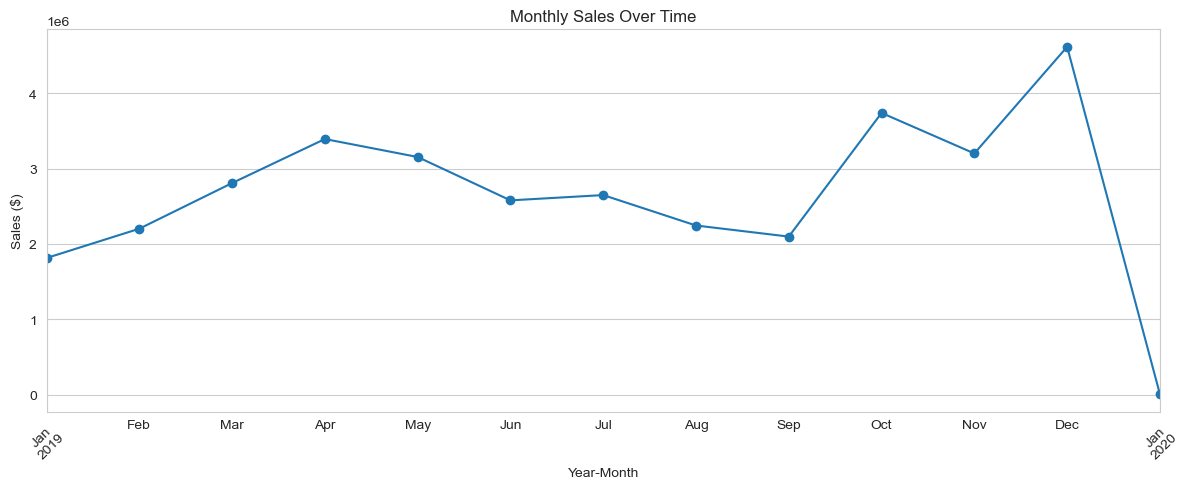

In [18]:
# -----------------------------
# Visualize Monthly Sales
# -----------------------------
print("=== Block 2: Visualize Monthly Sales ===")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(12,5))
ts.plot(marker='o')
plt.title("Monthly Sales Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Sales ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [39]:
# -----------------------------
# Train/Test Split (Fixed)
# -----------------------------
print("=== Block 3: Train/Test Split ===")

# No need to convert index; monthly_sales.index is already datetime
train = monthly_sales['2019-01-01':'2019-12-01']
test = monthly_sales['2020-01-01':'2020-12-01']

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

print("\nTrain data:\n", train)
print("\nTest data:\n", test)







=== Block 3: Train/Test Split ===
Train shape: (12, 3)
Test shape: (1, 3)

Train data:
             Year  Month       Sales
YearMonth                          
2019-01-01  2019      1  1813586.44
2019-02-01  2019      2  2202022.42
2019-03-01  2019      3  2807100.38
2019-04-01  2019      4  3390670.24
2019-05-01  2019      5  3152606.75
2019-06-01  2019      6  2577802.26
2019-07-01  2019      7  2647775.76
2019-08-01  2019      8  2244467.88
2019-09-01  2019      9  2097560.13
2019-10-01  2019     10  3736726.88
2019-11-01  2019     11  3199603.20
2019-12-01  2019     12  4613443.34

Test data:
             Year  Month    Sales
YearMonth                       
2020-01-01  2020      1  8670.29


In [26]:
ts = combined_df.groupby(['Year','Month'])['Sales'].sum()
print(ts)


Year  Month
2019  1        1813586.44
      2        2202022.42
      3        2807100.38
      4        3390670.24
      5        3152606.75
      6        2577802.26
      7        2647775.76
      8        2244467.88
      9        2097560.13
      10       3736726.88
      11       3199603.20
      12       4613443.34
2020  1           8670.29
Name: Sales, dtype: float64


In [40]:
# === Block 4: Fit ARIMA Model ===
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings for clean output

from statsmodels.tsa.arima.model import ARIMA

# Use only the 'Sales' column for training
train_sales = train['Sales']

# Fit ARIMA model (simple example: order=(1,1,1))
arima_model = ARIMA(train_sales, order=(1,1,1))
arima_fit = arima_model.fit()

# Forecast for the test period (next 1 month)
forecast_arima = arima_fit.forecast(steps=len(test))
forecast_arima.index = test.index  # Align forecast index with test

# Display forecast
print("ARIMA Forecast:")
print(forecast_arima)





ARIMA Forecast:
YearMonth
2020-01-01    4.677500e+06
dtype: float64


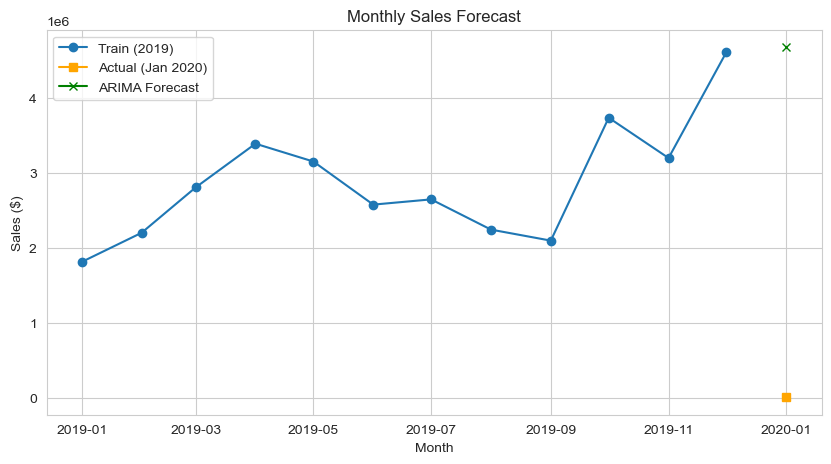

In [41]:
# === Plot Train, Test, and ARIMA Forecast ===
import matplotlib.pyplot as plt

# Ensure train and test have datetime index (already done as 'YearMonth')
# Extract only the Sales column for plotting
train_sales = train['Sales']
test_sales = test['Sales']

# ARIMA forecast (already computed)
forecast_sales = forecast_arima  # from Block 4

# Plot
plt.figure(figsize=(10,5))
plt.plot(train_sales, label='Train (2019)', marker='o')
plt.plot(test_sales, label='Actual (Jan 2020)', marker='s', color='orange')
plt.plot(forecast_sales, label='ARIMA Forecast', marker='x', color='green')
plt.title("Monthly Sales Forecast")
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.legend()
plt.grid(True)
plt.show()




In [42]:
# === Forecast Accuracy ===
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Only compare forecast with actual test sales
mape = mean_absolute_percentage_error(test_sales, forecast_sales) * 100
rmse = np.sqrt(mean_squared_error(test_sales, forecast_sales))

print("=== Block 6: Forecast Accuracy ===")
print(f"MAPE: {mape:.2f}%")
print(f"RMSE: ${rmse:,.2f}")



=== Block 6: Forecast Accuracy ===
MAPE: 53848.60%
RMSE: $4,668,829.44
